# Python for Deep Learning

This notebook will introduce you to the foundational components of PyTorch and walk you through building and training a simple neural network on the MNIST dataset. We'll cover tensors, automatic differentiation, neural network modules, loss functions, and optimizers.

#### Installation guide

In [ ]:
#!pip install numpy matplotlib torch torchvision

### Tensors: The Building Blocks
Tensors are the core data structure of PyTorch, similar to NumPy arrays but optimized for deep learning applications on GPUs. Understanding how to manipulate tensors is crucial for designing and implementing neural networks.

#### What is a Tensor?
A tensor in PyTorch is a multi-dimensional array used to store the inputs, outputs, and intermediate states of a model. It's akin to a matrix, but can have more than two dimensions.

#### Creating Tensors in PyTorch

In [12]:
import torch
import numpy as np

# Creating tensors from lists and NumPy arrays
tensor_from_list = torch.tensor([1, 2, 3])
tensor_from_numpy = torch.from_numpy(np.array([1, 2, 3]))
random_tensor = torch.rand(2, 3)  # Random 2x3 matrix

print("Tensor from list:", tensor_from_list)
print("Tensor from NumPy array:", tensor_from_numpy)
print("Random Tensor:", random_tensor)


Tensor from list: tensor([1, 2, 3])
Tensor from NumPy array: tensor([1, 2, 3])
Random Tensor: tensor([[0.0410, 0.6526, 0.9987],
        [0.2920, 0.6244, 0.4208]])


- `torch.tensor`: Creates a tensor directly from Python lists or sequences.
- `torch.from_numpy`: Converts a NumPy array into a tensor, facilitating interoperability.
- `torch.rand`: Generates tensors with random elements following a uniform distribution, useful for initializing weights.

#### Comparison with NumPy Arrays
While tensors and NumPy arrays are similar in many ways, tensors are designed to be used with GPUs, which can accelerate the computations needed for training neural networks. This makes them suitable for deep learning.

### Automatic Differentiation in PyTorch
Automatic differentiation is a core feature in PyTorch that allows you to automatically compute derivatives of tensors. This is crucial for training neural networks.

#### Autograd: Automatic Differentiation
PyTorch uses a module called `autograd` to handle automatic differentiation. When you perform operations on tensors, PyTorch dynamically creates a graph representing all operations. This graph is used to compute gradients later in the process.

In [13]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()

out.backward()  # Backpropagation to compute gradients
print("Gradients on x:", x.grad)


Gradients on x: tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


- `requires_grad=True`: Flags tensors for gradient tracking, enabling automatic gradient computation.
- `.backward()`: Performs backpropagation starting from a tensor, calculating gradients of all tensors with `requires_grad=True`.
- `x.grad`: Accesses the gradient tensor, storing the computed partial derivatives after backpropagation.

### Defining Neural Network Modules
Neural networks in PyTorch are built using the `nn.Module` class, which helps in organizing layers and provides useful methods and attributes.

#### Building a Simple MLP Architecture
We'll create a basic neural network with two hidden layers for classifying MNIST digits. The model consists of sequential fully connected layers (`fc1`, `fc2`), followed by an output layer (`fc3`), each separated by ReLU activations. This structure is typical for a simple classifier.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # First hidden layer
        self.fc2 = nn.Linear(256, 128)  # Second hidden layer
        self.fc3 = nn.Linear(128, 10)   # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = MLP()
print(model)


MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


- Subclass `nn.Module`: All neural network modules should inherit from `nn.Module`.
- Layers: Defined in the constructor, layers are typically set up as class attributes.
- Forward method: Implements the forward pass using defined layers and activations.
- `F.relu`: Applies the ReLU activation function to introduce non-linearities, essential for learning complex patterns.

### Loss Functions and Optimizers
To train the network, we need to define:
- Loss function: Loss functions measure how well the model's predictions match the target labels
- Optimizer: An optimizer updates the model's weights based on the computed gradients in order to minimize the loss.

In [15]:
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

- `nn.CrossEntropyLoss`: A common choice for classification tasks that combines a softmax layer and the negative log-likelihood loss.
- `torch.optim.Adam`: An efficient stochastic optimization method that adjusts the learning rate per parameter, suitable for many deep learning models.


### The MNIST Dataset

The MNIST dataset is a classic dataset in the machine learning community, consisting of 70,000 handwritten digits ranging from 0 to 9. Each image in the dataset is a 28x28 pixel grayscale image, making it straightforward for training simple neural network models. It is widely used for benchmarking image recognition algorithms.

#### Dataset Properties

- **Number of Images**: 70,000 (60,000 for training, 10,000 for testing)
- **Image Dimensions**: 28x28 pixels
- **Color Channels**: Grayscale (1 channel)
- **Classes**: 10 (Digits 0 through 9)

This dataset is ideal for demonstrating the basics of image classification, including how to preprocess image data, train a neural network, and evaluate its performance.


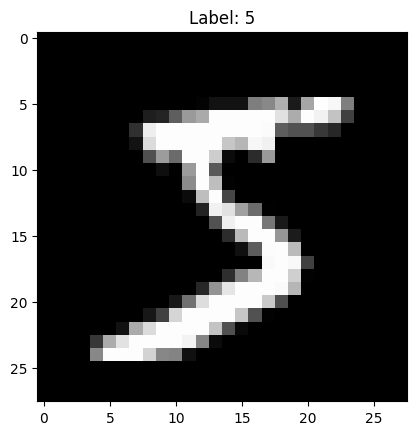

In [21]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Download the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Get one sample
image, label = mnist_trainset[0]

# Visualizing the image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')
plt.show()


In [22]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

- The `datasets.MNIST` function from `torchvision` downloads the MNIST dataset and applies transformations. Here, the transformation is converting images to PyTorch tensors.
- We specify `train=True` to download the training part of the dataset.


- `image.squeeze()` is used to remove single-dimensional entries from the shape of the array, which converts the tensor shape from [1, 28, 28] to [28, 28].
- `plt.imshow` is used to display the image. The colormap `gray` is used to show the image in grayscale, which matches the original format of MNIST images.
- The title of the plot shows the label of the image, indicating what digit it represents

### Training the Neural Network
We implement a training loop where the network undergoes forward passes, loss calculation, and backpropagation to adjust the weights. The code flattens images, computes predictions, calculates loss, and updates weights iteratively. This loop runs for a defined number of epochs, showing the loss after each epoch to monitor progress.

<img src="https://lh3.googleusercontent.com/d/1nJLAIOxtNX6b1klW6rIt0dY9h6CtA-xr" alt="drawing" width="800">

In [16]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data transformation and loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Training loop
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.view(-1, 28*28)  # Flatten the images
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')


Epoch 1, Loss: 0.33156120333907957
Epoch 2, Loss: 0.149772260739192
Epoch 3, Loss: 0.11168047790475158
Epoch 4, Loss: 0.09090785206809862
Epoch 5, Loss: 0.07626505861597965
Epoch 6, Loss: 0.06625211501006545
Epoch 7, Loss: 0.05978559370243004
Epoch 8, Loss: 0.051605539233324484
Epoch 9, Loss: 0.047736925805590226
Epoch 10, Loss: 0.03991798330262216


- Data Loading: Use `DataLoader` to batch and shuffle data efficiently.
- Zero Gradient: Clear existing gradients before calculating new ones to prevent accumulation from previous iterations.
- Forward Pass: Compute the predicted outputs using the model's `forward` method.
- Backward Pass and Optimization: Calculate gradients and update model parameters.

### Evaluating the Neural Network
Post-training evaluation assesses the model's generalization to new, unseen data using the test set. This step is crucial for understanding the model's real-world applicability. The function iterates through the test dataset, processes inputs, makes predictions, and calculates the accuracy percentage, reflecting the model's effectiveness on unseen data.

In [17]:
testset = datasets.MNIST('./data', download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

def calculate_accuracy(model, dataloader):
    model.eval()
    total = correct = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

accuracy = calculate_accuracy(model, testloader)
print(f'Accuracy of the model on the MNIST test images: {accuracy}%')


Accuracy of the model on the MNIST test images: 97.19%


- Set Evaluation Mode: `model.eval()` to ensure some layers (like dropout) behave consistently outside training.
- Disable Gradient Computation: `torch.no_grad()` to save memory and computational resources during inference.
- Accuracy Calculation: Compares the predicted and actual labels to determine the model's accuracy.

### Enhanced Neural Network Architecture (Bonus)
Increasing the depth of the network or adjusting layer sizes can often improve performance. Adding dropout layers can help prevent overfitting.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class EnhancedMLP(nn.Module):
    def __init__(self):
        super(EnhancedMLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x
    
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR

model = EnhancedMLP()
optimizer = Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.9)  # Decrease lr by 10% every epoch

for epoch in range(20):  # Training for more epochs
    model.train()
    for images, labels in trainloader:
        images = images.view(-1, 784)  # Flatten the images
        optimizer.zero_grad()
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
    scheduler.step()  # Adjust the learning rate
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(-1, 784)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

evaluate_model(model, testloader)


Epoch 1, Loss: 0.23641683161258698
Epoch 2, Loss: 0.4316581189632416
Epoch 3, Loss: 0.10128497332334518
Epoch 4, Loss: 0.09915493428707123
Epoch 5, Loss: 0.06296201050281525
Epoch 6, Loss: 0.04694775119423866
Epoch 7, Loss: 0.18252436816692352
Epoch 8, Loss: 0.057195473462343216
Epoch 9, Loss: 0.06851349771022797
Epoch 10, Loss: 0.013592571020126343
Epoch 11, Loss: 0.12758661806583405
Epoch 12, Loss: 0.01009565033018589
Epoch 13, Loss: 0.02392636053264141
Epoch 14, Loss: 0.0023526023142039776
Epoch 15, Loss: 0.13678543269634247
Epoch 16, Loss: 0.0009992520790547132
Epoch 17, Loss: 0.0011528509203344584
Epoch 18, Loss: 0.027501480653882027
Epoch 19, Loss: 0.010319183580577374
Epoch 20, Loss: 0.010656381025910378
Accuracy: 98.37%


### Conclusion

Through this comprehensive workshop, we've explored the foundational concepts and practical implementations of building and evaluating neural networks using PyTorch. We delved into the structure and manipulation of tensors, understanding automatic differentiation, and implementing neural networks from scratch. Here are the key takeaways:

Key Learnings
- Tensors as Building Blocks: We learned how tensors serve as the fundamental units for storing data and performing computations in PyTorch, optimized for both CPU and GPU usage.
- Automatic Differentiation: The autograd system in PyTorch simplifies the computation of gradients, making it easier to train neural networks efficiently.
- Neural Network Modules: By defining custom models using nn.Module, we can create complex architectures tailored to specific tasks.
- Training and Optimization: Implementing the training loop, including forward pass, loss computation, backpropagation, and parameter updates using optimizers like Adam, equips us with the skills to train various neural network models.
- Evaluation of Models: We emphasized the importance of evaluating model performance on a test set to assess generalization capabilities, using metrics like accuracy.